In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Завантаж датасет з бібліотеки seaborn:

In [ ]:
df = sns.load_dataset("titanic")      #завантаження датасету
df.shape     #розмір таблиці

(891, 15)

2. Переглянь перші рядки датасету. Зроби висновок, чи коректно він завантажився.

In [ ]:
df.head()       #показує перші 5 рядків таблиці

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Перевір типи стовпців. Які з них потребують перетворення?

In [ ]:
df.dtypes
#перетворення потребує alive

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


4. Перевір статистику по УСІМ стовпцям датасету.

In [ ]:
df.describe(include='all')
#завдання виконано вірно, NaN вивело там, де статистика не можлива

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. Спробуй оцінити кількість дублікатів. Виміряй число рядків, позбудься дублікатів, оціни нову кількість рядків. Різницю виведи на екран, це і буде кількість рядків.

In [ ]:
initial_rows = df.shape[0]          #пошук дублікатів
duplicates = df.duplicated().sum()

df = df.drop_duplicates() #видалення дублікатів
new_rows = df.shape[0]

print("Було рядків:", initial_rows)
print("Дублікатів:", duplicates)
print("Стало рядків:", new_rows)
print("Видалено:", initial_rows - new_rows)

Було рядків: 891
Дублікатів: 107
Стало рядків: 784
Видалено: 107


6. Необхідно створити єдиний стовпчик, що вказує кількість родичів для кожного пасажира на борту, замість:
Кількість братів/сестер або чоловіків/дружин на борту
Кількість батьків або дітей на борту
Булева ознака: True, якщо пасажир подорожував один (без родичів на борту)
після створення нового стовпчика, дропни попередні. Вони вже не потрібні.

In [ ]:
df['relatives'] = df['sibsp'] + df['parch']
df['travelled_alone'] = df['relatives'] == 0

df = df.drop(columns=['sibsp', 'parch'])  #видалення колонок

df[['relatives', 'travelled_alone']].head()

,relatives,travelled_alone
0,1,False
1,1,False
2,0,True
3,1,False
4,0,True


7. Перевір частоту випадків за значеннями в  новому стовпчику (кількість родичів) використовуючи візуалізацію:

relatives
10      2
7       6
6      12
4      13
5      22
3      28
2     101
1     154
0     446
Name: count, dtype: int64


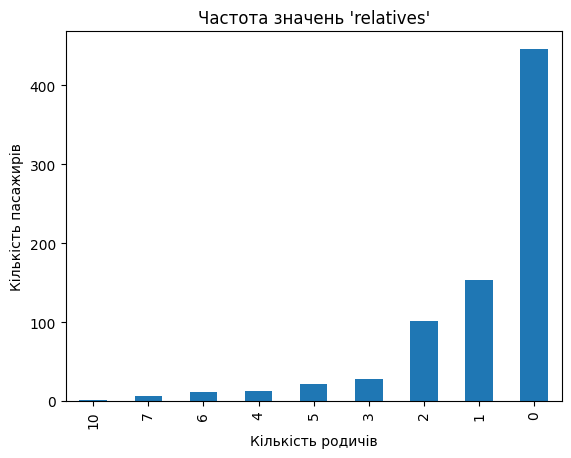

In [ ]:
relatives_count = df['relatives'].value_counts()

relatives_count = relatives_count.sort_values()    #як часто зустрічається кожна кількість родичів
print(relatives_count)

import matplotlib.pyplot as plt
relatives_count.plot(kind='bar')

plt.title("Частота значень 'relatives'")
plt.xlabel("Кількість родичів")
plt.ylabel("Кількість пасажирів")
plt.show()

8. Використовуючи лямбда функцію заміни кількість родичів, що перевищує число 5(п'ять) на значення "above 5"(понад п'ять):

In [ ]:
df['relatives_mod'] = df['relatives'].apply(lambda x: 'above 5' if pd.notnull(x) and x > 5 else str(int(x)))
rel_cats = [str(i) for i in range(0,6)] + ['above 5']
df['relatives_mod'] = pd.Categorical(df['relatives_mod'], categories=rel_cats, ordered=True)
print(df['relatives_mod'].value_counts().sort_index())

relatives_mod
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64


9. Необхідно вивести на екран статистику по модифікованому стовпцю, віднісши нову категорію в кінець( для цього слід перетворити стовпець в категорійний):

In [ ]:
df['relatives_mod'] = pd.Categorical(
    df['relatives_mod'],
    categories=[str(i) for i in range(0,6)] + ['above 5'],
    ordered=True
)

print(df['relatives_mod'].cat.categories)  #всі категорії
print(df['relatives_mod'].value_counts(dropna=False, sort=False))  #counts у правильному порядку категорій

Index(['0', '1', '2', '3', '4', '5', 'above 5'], dtype='object')
relatives_mod
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64


10. Заповни відсутні значення віку медіаною.

In [ ]:
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
median_age

28.25

11. Створи новий стовпець, де вік представлено категорією, замість числа (наприклад: до 14 років, 14-34 роки, 35-59 років, 60 і більше років). Виконай задачу з використанням користувацької функції. Осіб з невідомим віком познач відповідно.

In [ ]:
def age_group_label(age):
    if age < 14:
        return "до 14 років"
    elif age <= 34:
        return "14-34 роки"
    elif age <= 59:
        return "35-59 років"
    else:
        return "60 і більше років"

df['age_group'] = df['age'].apply(age_group_label)
df['age_group'] = pd.Categorical(df['age_group'], categories=["до 14 років","14-34 роки","35-59 років","60 і більше років","unknown"],ordered=True)    #впорядкування вікових категорій
print(df['age_group'].value_counts(dropna=False))

age_group
14-34 роки           482
35-59 років          206
до 14 років           70
60 і більше років     26
unknown                0
Name: count, dtype: int64


12. Перевір, в якій віковій категорії була найвища смертність. Для цього рекомендується перетворити стовпець 'alive' в булевий тип. Потім підрахувати загальну кількість пасажирів та кількість тих, хто не вижив. Потім обчисли відносний показниках для кожної категорії.

In [ ]:
df['alive_bool'] = df['alive'].map({'yes': True, 'no': False})     #перетворення alive в булевий формат

total = df.groupby('age_group')['alive_bool'].count()  #загальна кількість
dead = df.groupby('age_group')['alive_bool'].apply(lambda x: (x == False).sum())  #кількість тих, хто не вижив
mortality = (dead / total) * 100   #% смертності

mortality.sort_values(ascending=False)

/tmp/ipython-input-1013489345.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df.groupby('age_group')['alive_bool'].count()  #загальна кількість
/tmp/ipython-input-1013489345.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dead = df.groupby('age_group')['alive_bool'].apply(lambda x: (x == False).sum())  #кількість тих, хто не вижив


,alive_bool
age_group,
60 і більше років,73.076923
14-34 роки,60.788382
35-59 років,58.252427
до 14 років,41.428571
unknown,NaN


13. Відтвори cтатистику  смертності у вигляді кругової діаграми з розбивкою по віковим групам. Ти помітив, що відсотки відрізняються? Поясни чому.

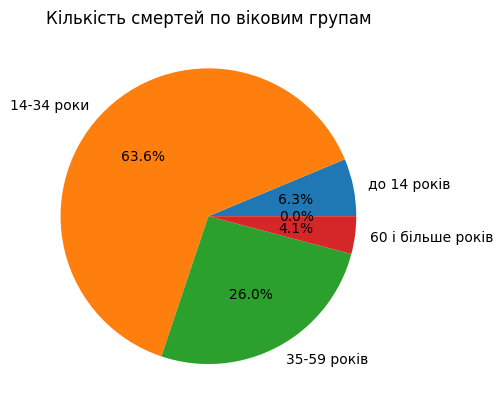

In [ ]:
dead.plot(kind='pie', autopct='%1.1f%%')
plt.title("Кількість смертей по віковим групам")
plt.ylabel("")
plt.show()

Пояснення:
У завданні 12 код виводить результат де показано відсоток смертності в кожній віковій групі. А в 13 завданні показано частку кожної групи у загальній кількості смертей на кораблі.

14. *Бонусне завдання*

Підготуй розгорнуту статистику смертності по категорії віку, класу квитка, рівню каюти та кількості родичів. Які фактори, на твою думку, найбільше пов'язані з рівнем смерності? (наприклад: найбільша смертність у відсотковому значенні спостерігається серед вікової групи ... класу квитка.... при наявності ... родичів та для рівня каюти.... Фактор ... має найвищий вплив на смертність)

In [ ]:
df['alive_bool'] = df['alive'].map({'yes': True, 'no': False})   #створення булево стовпця для аналізу смертей

In [ ]:
#Смертність за віковою категорією
age_total = df.groupby('age_group')['alive_bool'].count()   #загальна кількість пасасижирів
age_dead = df.groupby('age_group')['alive_bool'].apply(lambda x: (x == False).sum())   #кількість померлих по кожній віковій групі
age_mortality = (age_dead / age_total) * 100     #% смертності

print("Смертність за віковими групами (%):")
print(age_mortality.sort_values(ascending=False))

Смертність за віковими групами (%):
age_group
60 і більше років    73.076923
14-34 роки           60.788382
35-59 років          58.252427
до 14 років          41.428571
unknown                    NaN
Name: alive_bool, dtype: float64


/tmp/ipython-input-3510879626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_total = df.groupby('age_group')['alive_bool'].count()   #загальна кількість пасасижирів
/tmp/ipython-input-3510879626.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dead = df.groupby('age_group')['alive_bool'].apply(lambda x: (x == False).sum())   #кількість померлих по кожній віковій групі


Висновок:
Найвища смертність спостерігається серед пасажирів, що належать до вікової групи 60+, що обумовлено природними факторами (фізичною слабкістю, малобільністю).
Найнижчий відсоток спостерігається серед вікової категорії до 14 років, оскільки дітям мали допомагати евакуюватися першими.

In [ ]:
#Смертність за класом квитка
class_total = df.groupby('pclass')['alive_bool'].count()
class_dead = df.groupby('pclass')['alive_bool'].apply(lambda x: (x == False).sum())
class_mortality = (class_dead / class_total) * 100

print("Смертність за класом квитка (%):")
print(class_mortality.sort_values(ascending=False))

Смертність за класом квитка (%):
pclass
3    74.320988
2    49.090909
1    36.915888
Name: alive_bool, dtype: float64


Висновок:
Найбільший % смерності виявлено серед пасажирів 3 класу, а найменша серед пасажирів 1 класу. Оскільки ті хто подорожував 1 класом мали кращий доступ до рятувальних човнів і, відповідно, їх каюти мали бути розташовані на верхніх рівнях.

In [ ]:
#Смертність за рівнем каюти
deck_total = df.groupby('deck')['alive_bool'].count()
deck_dead = df.groupby('deck')['alive_bool'].apply(lambda x: (x == False).sum())
deck_mortality = (deck_dead / deck_total) * 100

print("Смертність за рівнем каюти (%):")
print(deck_mortality.sort_values(ascending=False))

Смертність за рівнем каюти (%):
deck
A    53.333333
G    50.000000
C    40.677966
F    38.461538
B    26.086957
E    25.000000
D    24.242424
Name: alive_bool, dtype: float64


/tmp/ipython-input-2613090869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_total = df.groupby('deck')['alive_bool'].count()
/tmp/ipython-input-2613090869.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_dead = df.groupby('deck')['alive_bool'].apply(lambda x: (x == False).sum())


Висновок:
Найвища смертність спостерігається серед пасажирів рівнів A та G.
Для рівня G це пояснюється тим, що вона розташована найнижче, тому пасажири фізично не встигали дістатися рятувальних човнів.

Високий відсоток смертності на палубі A можна пояснити великою кількістю чоловіків, що мусили чекати на евакуацію (діти та жінки евакуюються першими).

Найнижча смертність спостерігається на палубах D, E та B.

In [ ]:
#Смертність за кількістю родичів
relative_total = df.groupby('relatives_mod')['alive_bool'].count()
relative_dead = df.groupby('relatives_mod')['alive_bool'].apply(lambda x: (x == False).sum())
relative_mortality = (relative_dead / relative_total) * 100

print("Смертність за кількістю родичів (%):")
print(relative_mortality.sort_values(ascending=False))

Смертність за кількістю родичів (%):
relatives_mod
5          86.363636
above 5    80.000000
4          76.923077
0          66.367713
1          44.805195
2          42.574257
3          28.571429
Name: alive_bool, dtype: float64


/tmp/ipython-input-3719016341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_total = df.groupby('relatives_mod')['alive_bool'].count()
/tmp/ipython-input-3719016341.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_dead = df.groupby('relatives_mod')['alive_bool'].apply(lambda x: (x == False).sum())


Висновок:
Найвища смертність спостерігається серед пасажирів, які мали 5 або більше родичів.Великі групи людей могли піддатись паніці, особливо сімї з літьми, також дорослі могли втратити з виду дітей та починати їх пошук, й зазвичай великі родини займали нижні рівні (обумовлпено вартістю квитка).

Високий рівень смертності є серед пасажирів, які подорожували без родичів. Це може бути пов’язано з віком (людям 60+, яким ніхто не допоміг), також статевою ознакою (чоловіки, які евакуювалися в останню чергу).

Найнижчий % смертності виявлено серед пасажирів з 3 родичами. Це може бути обумовлено тим, що сімям з 3 осіб легше координувати дії, триматись разом та допомогати один одному.

In [ ]:
max_values = {
    'age_group': age_dead.max(),
    'pclass': class_dead.max(),
    'deck': deck_dead.max(),
    'relatives_mod': relative_dead.max()
}

print("ПОРІВНЯННЯ МАКСИМАЛЬНИХ ПОКАЗНИКІВ СМЕРТНОСТІ:")
for factor, value in max_values.items():
    print(factor, "→", round(value, 2), "%")

ПОРІВНЯННЯ МАКСИМАЛЬНИХ ПОКАЗНИКІВ СМЕРТНОСТІ:
age_group → 293 %
pclass → 301 %
deck → 24 %
relatives_mod → 296 %


Висновок:
Найбільший вплив на рівень смертності мав клас квитка, що швидше за все обумовлено соціальним і фінансовим статусом пасажирів. Другим за впливом показником є кількість родичів, згідно з аналізом пасажири, що подорожували втрьох мали менші труднощі з евакуацією, на відміну від пасажирів з кількістю 5 та більше осіб. Третім по рівню впливу став вік пасажирів, оскільки пасажири 60+ мали мало шансів вижити. Найменший вплив згідно аналізу мав рівень каюти.